In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score as cvs
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [6]:
data = pd.read_csv(r"C:\Users\Administrator\Desktop\Machine Learning\Data preprocessing\digit recognizer\train.csv")

In [7]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [8]:
from sklearn.feature_selection import VarianceThreshold

In [9]:
X = VarianceThreshold().fit_transform(x)

In [10]:
X.shape

(42000, 708)

In [11]:
x.shape

(42000, 784)

In [12]:
 np.median(x.var().values)

1352.286703180131

In [13]:
x_fsvar = VarianceThreshold(np.median(x.var().values)).fit_transform(x)

In [13]:
%%timeit
cvs(RFC(n_estimators=10,random_state=0),x,y,cv = 5).mean()

10.9 s ± 185 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%%timeit
cvs(RFC(n_estimators=10,random_state=0),x_fsvar,y,cv = 5).mean()

9.75 s ± 208 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
cvs(RFC(n_estimators=10,random_state=0),x,y,cv = 5).mean()

0.9373571428571429

In [16]:
cvs(RFC(n_estimators=10,random_state=0),x_fsvar,y,cv = 5).mean()

0.9390476190476191

In [17]:
cvs(RFC(n_estimators=15,random_state=0),x_fsvar,y,cv = 5).mean()

0.9490714285714287

In [18]:
cvs(RFC(n_estimators=5,random_state=0),x_fsvar,y,cv = 5).mean()

0.9098095238095238

In [19]:
cvs(RFC(n_estimators=20,random_state=0),x_fsvar,y,cv = 5).mean()

0.9535238095238097

In [20]:
cvs(RFC(n_estimators=30,random_state=0),x_fsvar,y,cv = 5).mean()

0.9581190476190476

In [22]:
x_fschi = SelectKBest(chi2, k = 300).fit_transform(x_fsvar,y)

In [23]:
x_fschi.shape

(42000, 300)

In [24]:
cvs(RFC(n_estimators=20,random_state=0),x_fschi,y,cv = 5).mean()

0.9488095238095238

<function matplotlib.pyplot.show(close=None, block=None)>

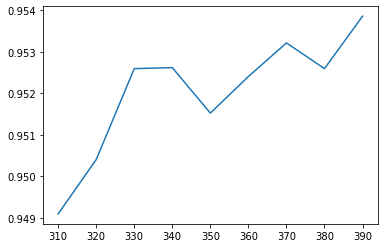

In [28]:
#learning curve
import matplotlib.pyplot as plt

score = []
for i in range(390,300,-10):
    x_fschi = SelectKBest(chi2,k=i).fit_transform(x_fsvar,y)
    zz = cvs(RFC(n_estimators=20,random_state=0),x_fschi,y,cv = 5).mean()
    score.append(zz)
plt.plot(range(390,300,-10),score)
plt.show


In [29]:
chivalue,pvalue_chi = chi2(x_fsvar,y)

In [32]:
k = chivalue.shape[0]-(pvalue_chi>0.05).sum()

In [33]:
x_fschi = SelectKBest(chi2, k).fit_transform(x_fsvar,y)
cvs(RFC(n_estimators=20,random_state=0),x_fschi,y,cv = 5).mean()

E:\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass k=392 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.9535238095238097

In [1]:
from sklearn.feature_selection import f_classif

In [14]:
F, pvalues_f = f_classif(x_fsvar,y)

In [17]:
k = F.shape[0] - (pvalues_f >0.05).sum()

In [18]:
k

392

In [19]:
#x_fsF = SelectKBest(f_classif, k = ).fit_transform(x_fsvar,y)
#cross_val_score(RFC(n_estimators=20),random_state=0),x_fsF,cv=5).mean()

In [20]:
from sklearn.feature_selection import mutual_info_classif as MIC
result = MIC(x_fsvar,y)
k = result.shape[0]-sum(result <= 0)

In [21]:
k

392

In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

In [27]:
RFC_ = RFC(n_estimators =20)#实例化后才能进入SelcetFromModel
x_embedded = SelectFromModel(RFC_,threshold= 0.005).fit_transform(x,y)

In [28]:
x_embedded.shape

(42000, 48)

<function matplotlib.pyplot.show(close=None, block=None)>

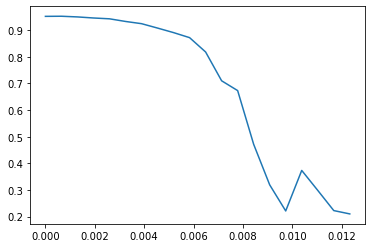

In [31]:
import numpy as np
import matplotlib.pyplot as plt

RFC_.fit(x,y).feature_importances_

threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)

score=[]
for i in threshold:
    x_embedded = SelectFromModel(RFC_,threshold= i).fit_transform(x,y)
    once = cvs(RFC_, x_embedded,y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show

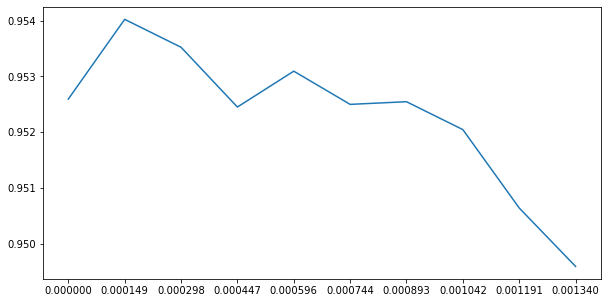

In [33]:
score2 = []
for i in np.linspace(0,0.00134,10):
    x_embedded = SelectFromModel(RFC_,threshold = i).fit_transform(x,y)
    once = cvs(RFC_,x_embedded,y,cv=5).mean()
    score2.append(once)
plt.figure(figsize = [10,5])
plt.plot(np.linspace(0,0.00134,10),score2)
plt.xticks(np.linspace(0,0.00134,10))
plt.show()

In [34]:
x_embedded.shape

(42000, 247)

In [35]:
x_embedded = SelectFromModel(RFC_,threshold= 0.000149).fit_transform(x,y)
cvs(RFC_,x_embedded,y,cv=5).mean()

0.9527142857142857

In [37]:
score=[]
for i in range(0,200,10):
    rfc = RFC(n_estimators = i+1)
    zz = cvs(rfc,x_embedded,y,cv=10).mean()
    score.append(zz)


<function matplotlib.pyplot.show(close=None, block=None)>

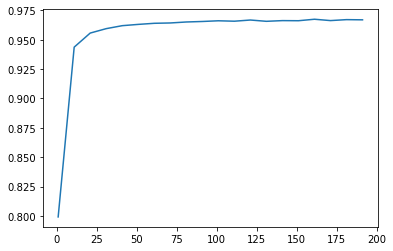

In [38]:
plt.plot(range(1,201,10),score)
plt.show

In [41]:
print(max(score),([*range(1,201)][score.index(max(score))]))

0.9674285714285714 17


In [43]:
rfc = RFC(n_estimators = 171)
cvs(rfc,x_embedded,y,cv=5).mean()

0.965595238095238

In [44]:
from sklearn.feature_selection import RFE

In [46]:
RFC_ = RFC(n_estimators = 171)
selector = RFE(RFC_, n_features_to_select = 340, step=50).fit(x,y)

In [47]:
selector.support_.sum()

340

In [48]:
x_wrapper = selector.transform(x)
cvs(RFC_,x_wrapper,y,cv=5).mean()

0.9644523809523811